<a href="https://colab.research.google.com/github/minhduc01168/ET_Tri_tue_nhan_tao/blob/master/BTL_AI_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Problem Description
# ANN.py
# Description :
# Predict whether the customer is creditable or not .
# datasets :Bộ dữ liệu sẽ được sử dụng được tìm thấy trên Kaggle và nó chứa dữ liệu cho 32.581 người vay và 11 biến 
# Artificial Neural Network
# Special requirements or dependencies :
# None ; Tested in Mac OS X with Python 
# Compilation and execution :
# Compilation not necessary
# Execution takes approx 8 -10 minutes on most modern ←- hardware .
# For the execution in terminal
# python ANN .py

In [ ]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the dataset
df = pd.read_csv('/content/drive/My Drive/AI_ML_DS/AI/BTL_AI/credit_risk_dataset_after.csv')

In [ ]:
X = pd.DataFrame(df)
X = X.drop(['loan_status'], axis=1)
y = df[['loan_status']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29998 non-null  int64  
 1   person_income               29998 non-null  int64  
 2   person_home_ownership       29998 non-null  int64  
 3   person_emp_length           29998 non-null  float64
 4   loan_intent                 29998 non-null  int64  
 5   loan_grade                  29998 non-null  int64  
 6   loan_amnt                   29998 non-null  int64  
 7   loan_int_rate               29998 non-null  float64
 8   loan_percent_income         29998 non-null  float64
 9   cb_person_default_on_file   29998 non-null  int64  
 10  cb_person_cred_hist_length  29998 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 2.5 MB


Tập dữ liệu được phân chia: 
* Training set: 64% 
* Validation set: 16%
* Test set: 20%

In [ ]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
# X_train , X_test , y_train , y_test = train_test_split (X, y, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.16, random_state=1)

In [ ]:
print("-----------------------")
print(X_train.shape)
print(y_train.shape)
print("-----------------------")
print(X_test.shape)
print(y_test.shape)
print("-----------------------")

-----------------------
(23938, 11)
(23938, 1)
-----------------------
(1500, 11)
(1500, 1)
-----------------------


In [ ]:
np.shape( X_test )[1]

11

In [ ]:
# Make the ANN!
# Importing the Keras libraries and packages
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Xây dựng model

In [ ]:
# Initialize Sequential object
ann = tf.keras.models.Sequential()

# Total no. of Neurons = 6
# We will be adding 2 hidden layers in our Neural Network
ann.add(tf.keras.layers.Dense(units=10, activation='relu',input_dim = np.shape( X_test )[1]))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
# Adding Output Later
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Initializing our Compiler
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train our model
# ann.fit(X_train, y_train, batch_size=128, epochs=150, verbose=1)
history = ann.fit(X_train, y_train, epochs=100, batch_size=25, validation_data=(X_val, y_val))
# batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.

Epoch 1/100
958/958 [==============================] - 9s 7ms/step - loss: 5.3127 - accuracy: 0.7613 - val_loss: 0.5055 - val_accuracy: 0.7980
Epoch 2/100
958/958 [==============================] - 8s 8ms/step - loss: 0.5118 - accuracy: 0.7958 - val_loss: 0.5287 - val_accuracy: 0.7980
Epoch 3/100
958/958 [==============================] - 6s 7ms/step - loss: 0.5106 - accuracy: 0.7905 - val_loss: 0.5417 - val_accuracy: 0.7980
Epoch 4/100
958/958 [==============================] - 3s 4ms/step - loss: 0.5066 - accuracy: 0.7902 - val_loss: 0.4845 - val_accuracy: 0.7980
Epoch 5/100
958/958 [==============================] - 3s 3ms/step - loss: 0.5084 - accuracy: 0.7902 - val_loss: 0.5525 - val_accuracy: 0.7980
Epoch 6/100
958/958 [==============================] - 3s 3ms/step - loss: 0.4884 - accuracy: 0.7915 - val_loss: 0.4678 - val_accuracy: 0.7980
Epoch 7/100
958/958 [==============================] - 3s 3ms/step - loss: 0.4659 - accuracy: 0.8032 - val_loss: 0.4389 - val_accuracy: 0.8243

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


The below snippet plots the graph of the training loss vs. validation loss over the number of epochs

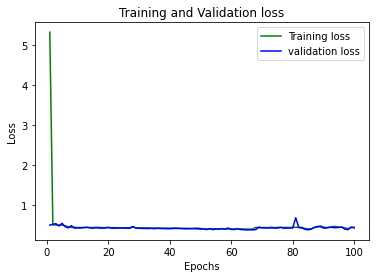

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The following snippet plots the graph of training accuracy vs. validation accuracy over the number of epochs.

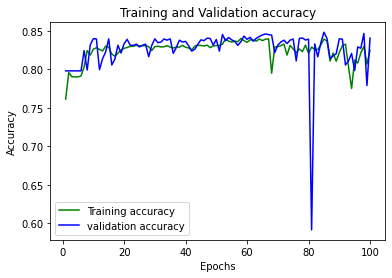

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)   # This will predict output values as 'True' and 'False'

47/47 [==============================] - 0s 1ms/step


In [ ]:
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)

# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction)
print(cm)
accuracy_score(y_test, y_prediction)

[[1165   49]
 [ 178  108]]


0.8486666666666667

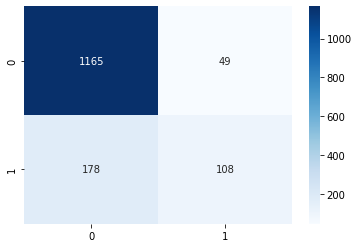

In [ ]:
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')